In [31]:
import pandas as pd 
from PIL import Image, ImageOps

from IPython.display import display

# !pip3 install sentence_transformers

from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-mpnet-base-v2", device='mps')

from sudulunu.helpers import pp, dumper

In [32]:
df = pd.read_csv('/Users/josh/Github/site/python/scrap/together.csv')
# ['Date', 'Title', 'img_path', 'Caption', 'Colours', 'Style', 
#  'Subject', 'Keywords', 'Category', 'img_alt', 'Width', 'Height']

corpus = df['Caption'].unique().tolist()


query = "A self portrait of the artist"
query_embeddings = model.encode(query, show_progress_bar=True, convert_to_tensor=True)

corpus_embeddings = model.encode(corpus, show_progress_bar=True, convert_to_tensor=True)


# result = util.semantic_search(query_embeddings, corpus_embeddings)[0]


# for item in result:
#     print(round(item["score"], 2), "|", corpus[item["corpus_id"]])
#     finder = df.loc[df["Caption"] == corpus[item["corpus_id"]]]
#     print(f"/Users/josh/Github/site/python/image_archive/{finder['img_alt']}")

Batches: 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]


0.62 | A sketch portrait in profile view drawn on white paper, showing a figure with long hair in a contemplative pose. The drawing captures subtle facial features and expressions through delicate linework.
/Users/josh/Github/site/python/image_archive/41Mouseinprofile2.jpg


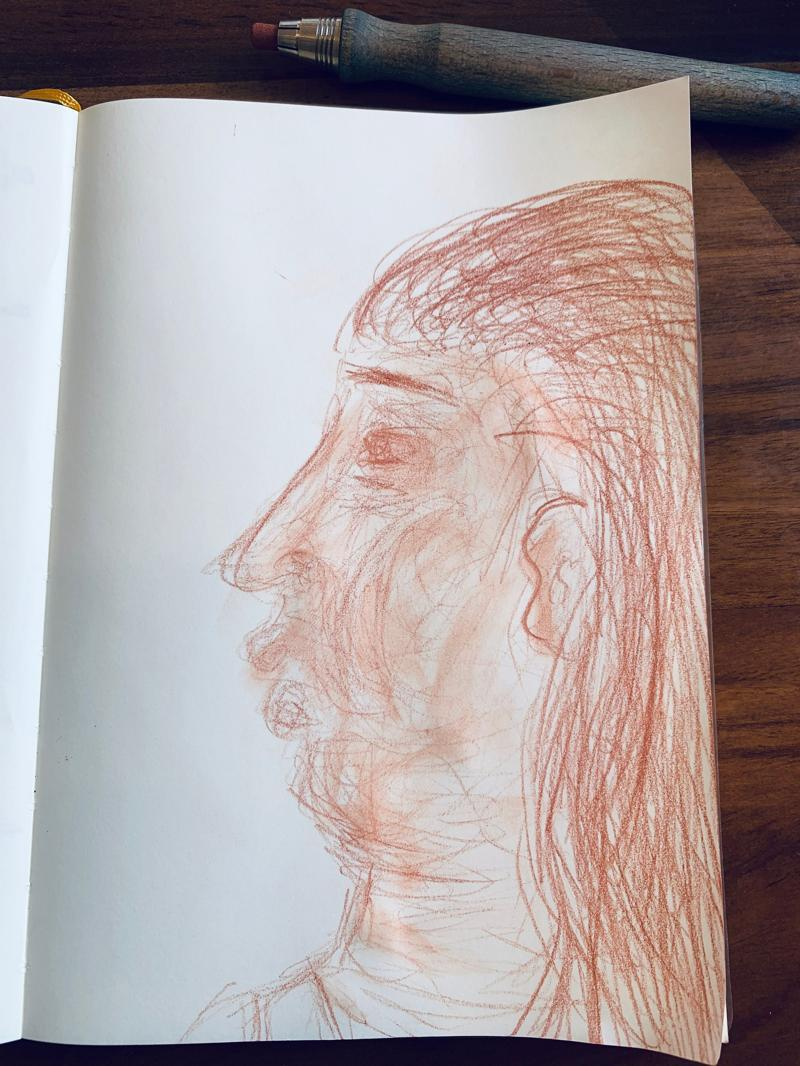

0.62 | A sketched portrait showing a face in profile view, rendered with loose, expressive linework. The drawing captures facial features with a stylized approach, showing tousled hair, defined cheekbones, and an ear with an earring. The sketch has a contemporary, artistic quality with gestural marks.
/Users/josh/Github/site/python/image_archive/63Quicklines9.jpg


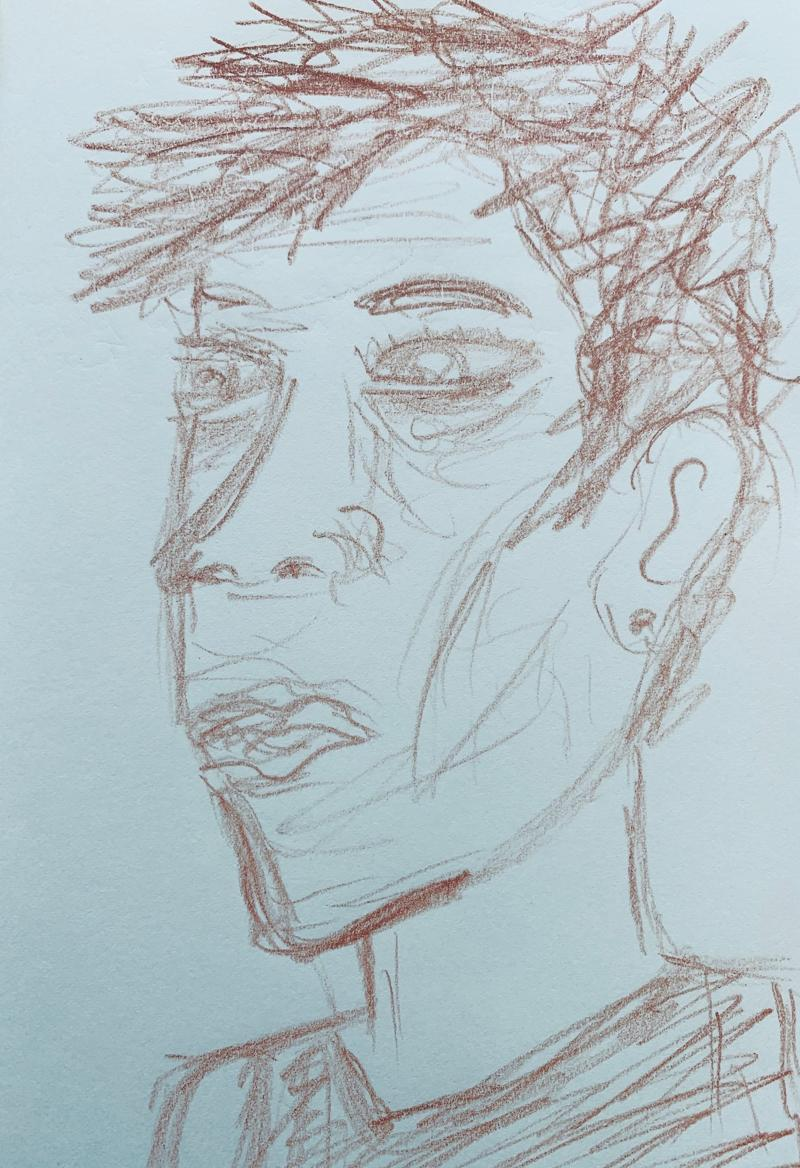

0.61 | A quick, gestural sketch on a spiral-bound sketchbook showing a portrait in profile view. The subject is wearing a hat with what appears to be some kind of decoration or bow. The drawing uses loose, confident line work to capture the essential features and form.
/Users/josh/Github/site/python/image_archive/bafkreid5a5reckocx2qcniwerhdp4dwydfjpxt7t3ffaut...


FileNotFoundError: [Errno 2] No such file or directory: '/Users/josh/Github/site/python/image_archive/bafkreid5a5reckocx2qcniwerhdp4dwydfjpxt7t3ffaut...'

In [33]:
result = util.semantic_search(query_embeddings, corpus_embeddings)[0]
for item in result:
    print(round(item["score"], 2), "|", corpus[item["corpus_id"]])
    finder = df.loc[df["Caption"] == corpus[item["corpus_id"]]]
    # print(finder)
    imageo = finder['img_path'].str.strip().to_string(index=False)
    print(f"/Users/josh/Github/site/python/image_archive/{imageo}")



    image = Image.open(f"/Users/josh/Github/site/python/image_archive/{imageo}")
    display(image)  